#Getting Data
 Website: https://ftp.ncbi.nlm.nih.gov/pub/clinvar/tab_delimited/

 I have taken the model inspiration from this research paper.

 Research Paper: https://pmc.ncbi.nlm.nih.gov/articles/PMC8285202/#B6

In [ ]:
!pip install pyfaidx

In [ ]:
!pip install imbalanced-learn

Downloading the variant_summary.txt file from the download link: https://ftp.ncbi.nlm.nih.gov/pub/clinvar/tab_delimited/variant_summary.txt.gz

**Dataset Source:**
The variant data used in this project was obtained from **ClinVar** (https://www.ncbi.nlm.nih.gov/clinvar/), a public archive of reports on the relationships among human genetic variants and phenotypes, with supporting evidence. It provides clinically curated annotations including clinical significance (benign/pathogenic), which were used as labels for training the classification model.




In [ ]:
!wget https://ftp.ncbi.nlm.nih.gov/pub/clinvar/tab_delimited/variant_summary.txt.gz

--2025-07-04 15:57:09--  https://ftp.ncbi.nlm.nih.gov/pub/clinvar/tab_delimited/variant_summary.txt.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.31, 130.14.250.7, 130.14.250.10, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 372755443 (355M) [application/x-gzip]
Saving to: ‘variant_summary.txt.gz’

variant_summary.txt 100%[===================>] 355.49M   147MB/s    in 2.4s    

2025-07-04 15:57:11 (147 MB/s) - ‘variant_summary.txt.gz’ saved [372755443/372755443]



#Data Preprocessing

**Unzipping the downloaded file**

In [ ]:
!gunzip variant_summary.txt.gz

In [ ]:
c=0
with open("variant_summary.txt") as f:
  for line in f:
    print(line)
    c=c+1
    if c==10:
      break


#AlleleID	Type	Name	GeneID	GeneSymbol	HGNC_ID	ClinicalSignificance	ClinSigSimple	LastEvaluated	RS# (dbSNP)	nsv/esv (dbVar)	RCVaccession	PhenotypeIDS	PhenotypeList	Origin	OriginSimple	Assembly	ChromosomeAccession	Chromosome	Start	Stop	ReferenceAllele	AlternateAllele	Cytogenetic	ReviewStatus	NumberSubmitters	Guidelines	TestedInGTR	OtherIDs	SubmitterCategories	VariationID	PositionVCF	ReferenceAlleleVCF	AlternateAlleleVCF	SomaticClinicalImpact	SomaticClinicalImpactLastEvaluated	ReviewStatusClinicalImpact	Oncogenicity	OncogenicityLastEvaluated	ReviewStatusOncogenicity	SCVsForAggregateGermlineClassification	SCVsForAggregateSomaticClinicalImpact	SCVsForAggregateOncogenicityClassification

15041	Indel	NM_014855.3(AP5Z1):c.80_83delinsTGCTGTAAACTGTAACTGTAAA (p.Arg27_Ile28delinsLeuLeuTer)	9907	AP5Z1	HGNC:22197	Pathogenic/Likely pathogenic	1	Dec 17, 2024	397704705	-	RCV000000012|RCV005255549|RCV004998069	MONDO:MONDO:0013342,MedGen:C3150901,OMIM:613647,Orphanet:306511||MedGen:C3661900	Hereditary sp

In [ ]:
import pandas as pd
df=pd.read_csv("variant_summary.txt", sep="\t", low_memory=False)

In [ ]:
df

,#AlleleID,Type,Name,GeneID,GeneSymbol,HGNC_ID,ClinicalSignificance,ClinSigSimple,LastEvaluated,RS# (dbSNP),...,AlternateAlleleVCF,SomaticClinicalImpact,SomaticClinicalImpactLastEvaluated,ReviewStatusClinicalImpact,Oncogenicity,OncogenicityLastEvaluated,ReviewStatusOncogenicity,SCVsForAggregateGermlineClassification,SCVsForAggregateSomaticClinicalImpact,SCVsForAggregateOncogenicityClassification
0,15041,Indel,NM_014855.3(AP5Z1):c.80_83delinsTGCTGTAAACTGTA...,9907,AP5Z1,HGNC:22197,Pathogenic/Likely pathogenic,1,"Dec 17, 2024",397704705,...,TGCTGTAAACTGTAACTGTAAA,-,-,-,-,-,-,SCV001451119|SCV005622007|SCV005909190,-,-
1,15041,Indel,NM_014855.3(AP5Z1):c.80_83delinsTGCTGTAAACTGTA...,9907,AP5Z1,HGNC:22197,Pathogenic/Likely pathogenic,1,"Dec 17, 2024",397704705,...,TGCTGTAAACTGTAACTGTAAA,-,-,-,-,-,-,SCV001451119|SCV005622007|SCV005909190,-,-
2,15042,Deletion,NM_014855.3(AP5Z1):c.1413_1426del (p.Leu473fs),9907,AP5Z1,HGNC:22197,Pathogenic,1,"Jun 29, 2010",397704709,...,G,-,-,-,-,-,-,SCV000020156,-,-
3,15042,Deletion,NM_014855.3(AP5Z1):c.1413_1426del (p.Leu473fs),9907,AP5Z1,HGNC:22197,Pathogenic,1,"Jun 29, 2010",397704709,...,G,-,-,-,-,-,-,SCV000020156,-,-
4,15043,single nucleotide variant,NM_014630.3(ZNF592):c.3136G>A (p.Gly1046Arg),9640,ZNF592,HGNC:28986,Uncertain significance,0,"Jun 29, 2015",150829393,...,A,-,-,-,-,-,-,SCV000020157,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7125708,4022831,Indel,NM_000545.8(HNF1A):c.474_475delinsCT (p.Lys158...,6927,HNF1A,HGNC:11621,Likely pathogenic,1,"Jun 27, 2025",-1,...,CT,-,-,-,-,-,-,SCV006101117,-,-
7125709,4022832,single nucleotide variant,NM_000545.8(HNF1A):c.1528G>A (p.Ala510Thr),6927,HNF1A,HGNC:11621,Uncertain significance,0,"Jun 20, 2025",-1,...,A,-,-,-,-,-,-,SCV006101118,-,-
7125710,4022832,single nucleotide variant,NM_000545.8(HNF1A):c.1528G>A (p.Ala510Thr),6927,HNF1A,HGNC:11621,Uncertain significance,0,"Jun 20, 2025",-1,...,A,-,-,-,-,-,-,SCV006101118,-,-
7125711,4022833,single nucleotide variant,NM_000545.8(HNF1A):c.773T>C (p.Leu258Pro),6927,HNF1A,HGNC:11621,Uncertain significance,0,"Jun 27, 2025",-1,...,C,-,-,-,-,-,-,SCV006101119,-,-


In [ ]:
df1=df[df['Type']=='single nucleotide variant']
df2=df1[df1['Assembly']=='GRCh38']
df3=df2[df2['ClinicalSignificance'].isin(["Pathogenic","Benign"])]
df4=df3[df3['Chromosome'].isin([str(i) for i in range(1,23)])]
print("Filtered Length: ", len(df4))
df=df4

Filtered Length:  245499


In [ ]:
df

,#AlleleID,Type,Name,GeneID,GeneSymbol,HGNC_ID,ClinicalSignificance,ClinSigSimple,LastEvaluated,RS# (dbSNP),...,AlternateAlleleVCF,SomaticClinicalImpact,SomaticClinicalImpactLastEvaluated,ReviewStatusClinicalImpact,Oncogenicity,OncogenicityLastEvaluated,ReviewStatusOncogenicity,SCVsForAggregateGermlineClassification,SCVsForAggregateSomaticClinicalImpact,SCVsForAggregateOncogenicityClassification
7,15044,single nucleotide variant,NM_017547.4(FOXRED1):c.694C>T (p.Gln232Ter),55572,FOXRED1,HGNC:26927,Pathogenic,1,"Mar 12, 2024",267606829,...,T,-,-,-,-,-,-,SCV000680696|SCV001363290|SCV002793147|SCV0029...,-,-
23,15053,single nucleotide variant,NM_000410.4(HFE):c.892+48G>A,3077,HFE,HGNC:4886,Benign,0,"Sep 11, 2018",1800758,...,A,-,-,-,-,-,-,SCV001844562,-,-
31,15057,single nucleotide variant,NM_000410.4(HFE):c.989G>T (p.Arg330Met),3077,HFE,HGNC:4886,Pathogenic,1,"Aug 01, 1999",111033558,...,T,-,-,-,-,-,-,SCV000020178,-,-
35,15059,single nucleotide variant,NM_020779.4(WDR35):c.25-2A>G,57539,WDR35,HGNC:29250,Pathogenic,1,"Sep 10, 2010",397515534,...,C,-,-,-,-,-,-,SCV000020180,-,-
37,15060,single nucleotide variant,NM_020779.4(WDR35):c.1844A>G (p.Glu615Gly),57539,WDR35,HGNC:29250,Pathogenic,1,"Sep 10, 2010",267607174,...,C,-,-,-,-,-,-,SCV000020181,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7125514,4022699,single nucleotide variant,NM_001170629.2(CHD8):c.5851C>T (p.Gln1951Ter),57680,CHD8,HGNC:20153,Pathogenic,1,"Dec 19, 2024",-1,...,A,-,-,-,-,-,-,SCV006100836,-,-
7125578,4022731,single nucleotide variant,NM_024740.2(ALG9):c.1695G>A (p.Trp565Ter),79796,ALG9,HGNC:15672,Pathogenic,1,"Jun 01, 2025",-1,...,T,-,-,-,-,-,-,SCV006100882,-,-
7125607,4022754,single nucleotide variant,NM_003108.4(SOX11):c.168C>A (p.Phe56Leu),6664,SOX11,HGNC:11191,Pathogenic,1,"Mar 06, 2025",-1,...,A,-,-,-,-,-,-,SCV006100944,-,-
7125656,4022792,single nucleotide variant,NM_000203.5(IDUA):c.501C>A (p.Tyr167Ter),3425,IDUA,HGNC:5391,Pathogenic,1,"Apr 07, 2025",-1,...,A,-,-,-,-,-,-,SCV006101027,-,-


In [ ]:
df['ClinSigSimple'].value_counts()

,count
ClinSigSimple,
0,172003
1,73496


ClinSigSimple
0    172003
1     73496
Name: count, dtype: int64


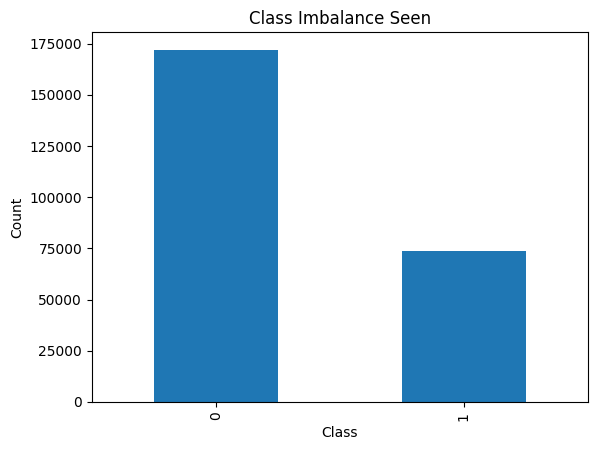

In [ ]:
import matplotlib.pyplot as plt
d=df['ClinSigSimple'].value_counts()
print(d)
d.plot(kind='bar')
plt.title("Class Imbalance Seen")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

No empty values in the dataset

In [ ]:
df.isna().sum()

,0
#AlleleID,0
Type,0
Name,0
GeneID,0
GeneSymbol,0
HGNC_ID,0
ClinicalSignificance,0
ClinSigSimple,0
LastEvaluated,0
RS# (dbSNP),0


In [ ]:
df['Chromosome'].isna().sum()

np.int64(0)

In [ ]:
df['Chromosome']

,Chromosome
7,11
23,6
31,6
35,2
37,2
...,...
7125514,14
7125578,11
7125607,2
7125656,4


In [ ]:
df['Start']

,Start
7,126275389
23,26093008
31,26093215
35,19989284
37,19945787
...,...
7125514,21393944
7125578,111809681
7125607,5692889
7125656,1001475


In [ ]:
df['Stop']

,Stop
7,126275389
23,26093008
31,26093215
35,19989284
37,19945787
...,...
7125514,21393944
7125578,111809681
7125607,5692889
7125656,1001475


In [ ]:
df["Start"].iloc[0]

np.int64(126275389)

In [ ]:
df['ReferenceAlleleVCF']

,ReferenceAlleleVCF
7,C
23,G
31,G
35,T
37,T
...,...
7125514,G
7125578,C
7125607,C
7125656,C


In [ ]:
df['AlternateAlleleVCF']

,AlternateAlleleVCF
7,T
23,A
31,T
35,C
37,C
...,...
7125514,A
7125578,T
7125607,A
7125656,A


Taking First 20000 rows for ease of working and hardware limitations

In [ ]:
df1=df.iloc[:20000]
len(df1)
df1

,#AlleleID,Type,Name,GeneID,GeneSymbol,HGNC_ID,ClinicalSignificance,ClinSigSimple,LastEvaluated,RS# (dbSNP),...,AlternateAlleleVCF,SomaticClinicalImpact,SomaticClinicalImpactLastEvaluated,ReviewStatusClinicalImpact,Oncogenicity,OncogenicityLastEvaluated,ReviewStatusOncogenicity,SCVsForAggregateGermlineClassification,SCVsForAggregateSomaticClinicalImpact,SCVsForAggregateOncogenicityClassification
7,15044,single nucleotide variant,NM_017547.4(FOXRED1):c.694C>T (p.Gln232Ter),55572,FOXRED1,HGNC:26927,Pathogenic,1,"Mar 12, 2024",267606829,...,T,-,-,-,-,-,-,SCV000680696|SCV001363290|SCV002793147|SCV0029...,-,-
23,15053,single nucleotide variant,NM_000410.4(HFE):c.892+48G>A,3077,HFE,HGNC:4886,Benign,0,"Sep 11, 2018",1800758,...,A,-,-,-,-,-,-,SCV001844562,-,-
31,15057,single nucleotide variant,NM_000410.4(HFE):c.989G>T (p.Arg330Met),3077,HFE,HGNC:4886,Pathogenic,1,"Aug 01, 1999",111033558,...,T,-,-,-,-,-,-,SCV000020178,-,-
35,15059,single nucleotide variant,NM_020779.4(WDR35):c.25-2A>G,57539,WDR35,HGNC:29250,Pathogenic,1,"Sep 10, 2010",397515534,...,C,-,-,-,-,-,-,SCV000020180,-,-
37,15060,single nucleotide variant,NM_020779.4(WDR35):c.1844A>G (p.Glu615Gly),57539,WDR35,HGNC:29250,Pathogenic,1,"Sep 10, 2010",267607174,...,C,-,-,-,-,-,-,SCV000020181,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177370,169115,single nucleotide variant,NM_001365088.1(SLC12A6):c.1492+45C>T,9990,SLC12A6,HGNC:10914,Benign,0,"Jul 10, 2021",10851964,...,A,-,-,-,-,-,-,SCV000974500|SCV001761306|SCV005294177,-,-
177372,169116,single nucleotide variant,NM_001365088.1(SLC12A6):c.1284C>T (p.Asn428=),9990,SLC12A6,HGNC:10914,Benign,0,"Jan 23, 2025",34098566,...,A,-,-,-,-,-,-,SCV000194911|SCV000390313|SCV000516091|SCV0010...,-,-
177378,169119,single nucleotide variant,NM_001365088.1(SLC12A6):c.475C>T (p.Leu159=),9990,SLC12A6,HGNC:10914,Benign,0,"Feb 04, 2025",7164902,...,A,-,-,-,-,-,-,SCV000194924|SCV000315722|SCV000390324|SCV0017...,-,-
177382,169121,single nucleotide variant,NM_001365088.1(SLC12A6):c.271+41G>C,9990,SLC12A6,HGNC:10914,Benign,0,"Jul 10, 2021",347836,...,G,-,-,-,-,-,-,SCV001761311|SCV001942861|SCV005296120,-,-


In [ ]:
Sccolumns_to_keep = ['Assembly', 'Start', 'Stop', 'Chromosome', 'ClinicalSignificance',"ClinSigSimple"]
df=df1[columns_to_keep]
df

,Assembly,Start,Stop,Chromosome,ClinicalSignificance,ClinSigSimple
7,GRCh38,126275389,126275389,11,Pathogenic,1
23,GRCh38,26093008,26093008,6,Benign,0
31,GRCh38,26093215,26093215,6,Pathogenic,1
35,GRCh38,19989284,19989284,2,Pathogenic,1
37,GRCh38,19945787,19945787,2,Pathogenic,1
...,...,...,...,...,...,...
177370,GRCh38,34250854,34250854,15,Benign,0
177372,GRCh38,34252219,34252219,15,Benign,0
177378,GRCh38,34258881,34258881,15,Benign,0
177382,GRCh38,34336369,34336369,15,Benign,0


In [ ]:
df['Chromosome'].unique()

array(['11', '6', '2', '20', '10', '19', '16', '22', '1', '8', '14', '21',
       '5', '4', '18', '15', '3', '17', '12', '7', '9', '13'],
      dtype=object)

In [ ]:
df['Chromosome'].value_counts()

,count
Chromosome,
2,2125
17,1678
1,1549
12,1279
11,1269
3,1201
7,1122
5,995
16,981


Using the **Esembl REST API** to directly download the GRCh38 human genome build for each chromosomes individually.

In [ ]:
import time
for i in range(1, 23):
      time.sleep(1)
    !wget ftp://ftp.ensembl.org/pub/release-110/fasta/homo_sapiens/dna/Homo_sapiens.GRCh38.dna.chromosome.{i}.fa.gz
    !gunzip Homo_sapiens.GRCh38.dna.chromosome.{i}.fa.gz


--2025-07-04 16:02:21--  ftp://ftp.ensembl.org/pub/release-110/fasta/homo_sapiens/dna/Homo_sapiens.GRCh38.dna.chromosome.1.fa.gz
           => ‘Homo_sapiens.GRCh38.dna.chromosome.1.fa.gz’
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.169
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.169|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/release-110/fasta/homo_sapiens/dna ... done.
==> SIZE Homo_sapiens.GRCh38.dna.chromosome.1.fa.gz ... 69273468
==> PASV ... done.    ==> RETR Homo_sapiens.GRCh38.dna.chromosome.1.fa.gz ... done.
Length: 69273468 (66M) (unauthoritative)

Homo_sapiens.GRCh38 100%[===================>]  66.06M  27.4MB/s    in 2.4s    

2025-07-04 16:02:25 (27.4 MB/s) - ‘Homo_sapiens.GRCh38.dna.chromosome.1.fa.gz’ saved [69273468]

--2025-07-04 16:02:29--  ftp://ftp.ensembl.org/pub/release-110/fasta/homo_sapiens/dna/Homo_sapiens.GRCh38.dna.chromosome.2.fa.gz
        

In [ ]:
!pip install pyfaidx

In [ ]:
from pyfaidx import Fasta


ref_allel=[]

for i in range(len(df)):
  genome=Fasta(f"/content/Homo_sapiens.GRCh38.dna.chromosome.{df['Chromosome'].iloc[i]}.fa")

  seq=genome[f"{df['Chromosome'].iloc[i]}"][df['Start'].iloc[i]-75:df['Stop'].iloc[i]+75]
  ref_allel.append(seq.seq)

print(len(ref_allel[0]))
print(len(ref_allel))

150
20000


In [ ]:
df['Ref_Allel']=ref_allel

/tmp/ipython-input-28-927425774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ref_Allel']=ref_allel


In [ ]:
df

,Assembly,Start,Stop,Chromosome,ClinicalSignificance,ClinSigSimple,Ref_Allel
7,GRCh38,126275389,126275389,11,Pathogenic,1,TTCTTATCACAGGGATGGAGGACGAAGGTTGGTTTGACCCCTGGTG...
23,GRCh38,26093008,26093008,6,Benign,0,TGGATCAGCCCCTCATTGTGATCTGGGGTATGTGACTGATGAGAGC...
31,GRCh38,26093215,26093215,6,Pathogenic,1,AGTCATTGGAGTCATCAGTGGAATTGCTGTTTTTGTCGTCATCTTG...
35,GRCh38,19989284,19989284,2,Pathogenic,1,CACCGCATGCTATGAACCCTTGTTCCTTGTTCCAGGATACACACTG...
37,GRCh38,19945787,19945787,2,Pathogenic,1,AAAGGGGAATCATCCAGGTTTTTATATTTGGCTCATTATTTATAGA...
...,...,...,...,...,...,...,...
177370,GRCh38,34250854,34250854,15,Benign,0,ATTGATACTGATAGCAAAGAGTAGAAGCAAATCTAGGAACCCTGAG...
177372,GRCh38,34252219,34252219,15,Benign,0,CTTGTCCAATAACTCCCTAACTTACCTGTAATTATACCACTAGCCA...
177378,GRCh38,34258881,34258881,15,Benign,0,CCTCACCTTGGTGGGCTTCTTTTTCCCTTCAGTGATGTTTTCTGCC...
177382,GRCh38,34336369,34336369,15,Benign,0,CCTGATGACTATTATAATCATAATTATATGATTATGATCTTCCAGA...


In [ ]:
df.to_csv('final_dataset.csv')

In [ ]:
df.head()

,Assembly,Start,Stop,Chromosome,ClinicalSignificance,ClinSigSimple,Ref_Allel
7,GRCh38,126275389,126275389,11,Pathogenic,1,TTCTTATCACAGGGATGGAGGACGAAGGTTGGTTTGACCCCTGGTG...
23,GRCh38,26093008,26093008,6,Benign,0,TGGATCAGCCCCTCATTGTGATCTGGGGTATGTGACTGATGAGAGC...
31,GRCh38,26093215,26093215,6,Pathogenic,1,AGTCATTGGAGTCATCAGTGGAATTGCTGTTTTTGTCGTCATCTTG...
35,GRCh38,19989284,19989284,2,Pathogenic,1,CACCGCATGCTATGAACCCTTGTTCCTTGTTCCAGGATACACACTG...
37,GRCh38,19945787,19945787,2,Pathogenic,1,AAAGGGGAATCATCCAGGTTTTTATATTTGGCTCATTATTTATAGA...


In [ ]:
df

,Assembly,Start,Stop,Chromosome,ClinicalSignificance,ClinSigSimple,Ref_Allel
7,GRCh38,126275389,126275389,11,Pathogenic,1,TTCTTATCACAGGGATGGAGGACGAAGGTTGGTTTGACCCCTGGTG...
23,GRCh38,26093008,26093008,6,Benign,0,TGGATCAGCCCCTCATTGTGATCTGGGGTATGTGACTGATGAGAGC...
31,GRCh38,26093215,26093215,6,Pathogenic,1,AGTCATTGGAGTCATCAGTGGAATTGCTGTTTTTGTCGTCATCTTG...
35,GRCh38,19989284,19989284,2,Pathogenic,1,CACCGCATGCTATGAACCCTTGTTCCTTGTTCCAGGATACACACTG...
37,GRCh38,19945787,19945787,2,Pathogenic,1,AAAGGGGAATCATCCAGGTTTTTATATTTGGCTCATTATTTATAGA...
...,...,...,...,...,...,...,...
177370,GRCh38,34250854,34250854,15,Benign,0,ATTGATACTGATAGCAAAGAGTAGAAGCAAATCTAGGAACCCTGAG...
177372,GRCh38,34252219,34252219,15,Benign,0,CTTGTCCAATAACTCCCTAACTTACCTGTAATTATACCACTAGCCA...
177378,GRCh38,34258881,34258881,15,Benign,0,CCTCACCTTGGTGGGCTTCTTTTTCCCTTCAGTGATGTTTTCTGCC...
177382,GRCh38,34336369,34336369,15,Benign,0,CCTGATGACTATTATAATCATAATTATATGATTATGATCTTCCAGA...


In [ ]:
import shutil

for i in range(len(df)):
  shutil.rmtree(f"/content/Homo_sapiens.GRCh38.dna.chromosome.{df['Chromosome'].iloc[i]}.fa")

In [ ]:
df2['AlternateAllele']

,AlternateAllele
5,na
7,na
9,na
11,na
13,na
...,...
7125698,na
7125700,na
7125706,na
7125710,na


In [ ]:
df4=df4["AlternateAlleleVCF"].iloc[:20000]

In [ ]:
df4

,AlternateAlleleVCF
7,T
23,A
31,T
35,C
37,C
...,...
177370,A
177372,A
177378,A
177382,G


In [ ]:
df['Alt']=df4

/tmp/ipython-input-36-686683678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Alt']=df4


In [ ]:
df

,Assembly,Start,Stop,Chromosome,ClinicalSignificance,ClinSigSimple,Ref_Allel,Alt
7,GRCh38,126275389,126275389,11,Pathogenic,1,TTCTTATCACAGGGATGGAGGACGAAGGTTGGTTTGACCCCTGGTG...,T
23,GRCh38,26093008,26093008,6,Benign,0,TGGATCAGCCCCTCATTGTGATCTGGGGTATGTGACTGATGAGAGC...,A
31,GRCh38,26093215,26093215,6,Pathogenic,1,AGTCATTGGAGTCATCAGTGGAATTGCTGTTTTTGTCGTCATCTTG...,T
35,GRCh38,19989284,19989284,2,Pathogenic,1,CACCGCATGCTATGAACCCTTGTTCCTTGTTCCAGGATACACACTG...,C
37,GRCh38,19945787,19945787,2,Pathogenic,1,AAAGGGGAATCATCCAGGTTTTTATATTTGGCTCATTATTTATAGA...,C
...,...,...,...,...,...,...,...,...
177370,GRCh38,34250854,34250854,15,Benign,0,ATTGATACTGATAGCAAAGAGTAGAAGCAAATCTAGGAACCCTGAG...,A
177372,GRCh38,34252219,34252219,15,Benign,0,CTTGTCCAATAACTCCCTAACTTACCTGTAATTATACCACTAGCCA...,A
177378,GRCh38,34258881,34258881,15,Benign,0,CCTCACCTTGGTGGGCTTCTTTTTCCCTTCAGTGATGTTTTCTGCC...,A
177382,GRCh38,34336369,34336369,15,Benign,0,CCTGATGACTATTATAATCATAATTATATGATTATGATCTTCCAGA...,G


In [ ]:
alt_seqs=[]

for i in range(len(df)):
    ref_seq=df['Ref_Allel'].iloc[i]
    alt=df['Alt'].iloc[i]

    mid=len(ref_seq) // 2
    alt_seq=ref_seq[:mid]+alt+ref_seq[mid+1:]
    alt_seqs.append(alt_seq)

df['Alt_Allel']=alt_seqs

/tmp/ipython-input-38-3765854022.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Alt_Allel']=alt_seqs


In [ ]:
alt=df['Alt'].iloc[5]
print(alt)

A


In [ ]:
df

,Assembly,Start,Stop,Chromosome,ClinicalSignificance,ClinSigSimple,Ref_Allel,Alt,Alt_Allel
7,GRCh38,126275389,126275389,11,Pathogenic,1,TTCTTATCACAGGGATGGAGGACGAAGGTTGGTTTGACCCCTGGTG...,T,TTCTTATCACAGGGATGGAGGACGAAGGTTGGTTTGACCCCTGGTG...
23,GRCh38,26093008,26093008,6,Benign,0,TGGATCAGCCCCTCATTGTGATCTGGGGTATGTGACTGATGAGAGC...,A,TGGATCAGCCCCTCATTGTGATCTGGGGTATGTGACTGATGAGAGC...
31,GRCh38,26093215,26093215,6,Pathogenic,1,AGTCATTGGAGTCATCAGTGGAATTGCTGTTTTTGTCGTCATCTTG...,T,AGTCATTGGAGTCATCAGTGGAATTGCTGTTTTTGTCGTCATCTTG...
35,GRCh38,19989284,19989284,2,Pathogenic,1,CACCGCATGCTATGAACCCTTGTTCCTTGTTCCAGGATACACACTG...,C,CACCGCATGCTATGAACCCTTGTTCCTTGTTCCAGGATACACACTG...
37,GRCh38,19945787,19945787,2,Pathogenic,1,AAAGGGGAATCATCCAGGTTTTTATATTTGGCTCATTATTTATAGA...,C,AAAGGGGAATCATCCAGGTTTTTATATTTGGCTCATTATTTATAGA...
...,...,...,...,...,...,...,...,...,...
177370,GRCh38,34250854,34250854,15,Benign,0,ATTGATACTGATAGCAAAGAGTAGAAGCAAATCTAGGAACCCTGAG...,A,ATTGATACTGATAGCAAAGAGTAGAAGCAAATCTAGGAACCCTGAG...
177372,GRCh38,34252219,34252219,15,Benign,0,CTTGTCCAATAACTCCCTAACTTACCTGTAATTATACCACTAGCCA...,A,CTTGTCCAATAACTCCCTAACTTACCTGTAATTATACCACTAGCCA...
177378,GRCh38,34258881,34258881,15,Benign,0,CCTCACCTTGGTGGGCTTCTTTTTCCCTTCAGTGATGTTTTCTGCC...,A,CCTCACCTTGGTGGGCTTCTTTTTCCCTTCAGTGATGTTTTCTGCC...
177382,GRCh38,34336369,34336369,15,Benign,0,CCTGATGACTATTATAATCATAATTATATGATTATGATCTTCCAGA...,G,CCTGATGACTATTATAATCATAATTATATGATTATGATCTTCCAGA...


In [ ]:
print(len(df['Ref_Allel'].iloc[2]))


150


In [ ]:
print(len(df['Alt_Allel'].iloc[2]))

150


In [ ]:
df.to_csv("Fully_Final.csv")

In [ ]:
df

,Assembly,Start,Stop,Chromosome,ClinicalSignificance,ClinSigSimple,Ref_Allel,Alt,Alt_Allel
7,GRCh38,126275389,126275389,11,Pathogenic,1,TTCTTATCACAGGGATGGAGGACGAAGGTTGGTTTGACCCCTGGTG...,T,TTCTTATCACAGGGATGGAGGACGAAGGTTGGTTTGACCCCTGGTG...
23,GRCh38,26093008,26093008,6,Benign,0,TGGATCAGCCCCTCATTGTGATCTGGGGTATGTGACTGATGAGAGC...,A,TGGATCAGCCCCTCATTGTGATCTGGGGTATGTGACTGATGAGAGC...
31,GRCh38,26093215,26093215,6,Pathogenic,1,AGTCATTGGAGTCATCAGTGGAATTGCTGTTTTTGTCGTCATCTTG...,T,AGTCATTGGAGTCATCAGTGGAATTGCTGTTTTTGTCGTCATCTTG...
35,GRCh38,19989284,19989284,2,Pathogenic,1,CACCGCATGCTATGAACCCTTGTTCCTTGTTCCAGGATACACACTG...,C,CACCGCATGCTATGAACCCTTGTTCCTTGTTCCAGGATACACACTG...
37,GRCh38,19945787,19945787,2,Pathogenic,1,AAAGGGGAATCATCCAGGTTTTTATATTTGGCTCATTATTTATAGA...,C,AAAGGGGAATCATCCAGGTTTTTATATTTGGCTCATTATTTATAGA...
...,...,...,...,...,...,...,...,...,...
177370,GRCh38,34250854,34250854,15,Benign,0,ATTGATACTGATAGCAAAGAGTAGAAGCAAATCTAGGAACCCTGAG...,A,ATTGATACTGATAGCAAAGAGTAGAAGCAAATCTAGGAACCCTGAG...
177372,GRCh38,34252219,34252219,15,Benign,0,CTTGTCCAATAACTCCCTAACTTACCTGTAATTATACCACTAGCCA...,A,CTTGTCCAATAACTCCCTAACTTACCTGTAATTATACCACTAGCCA...
177378,GRCh38,34258881,34258881,15,Benign,0,CCTCACCTTGGTGGGCTTCTTTTTCCCTTCAGTGATGTTTTCTGCC...,A,CCTCACCTTGGTGGGCTTCTTTTTCCCTTCAGTGATGTTTTCTGCC...
177382,GRCh38,34336369,34336369,15,Benign,0,CCTGATGACTATTATAATCATAATTATATGATTATGATCTTCCAGA...,G,CCTGATGACTATTATAATCATAATTATATGATTATGATCTTCCAGA...


In [ ]:
X=df[['Alt_Allel','Ref_Allel']]

In [ ]:
X

,Alt_Allel,Ref_Allel
7,TTCTTATCACAGGGATGGAGGACGAAGGTTGGTTTGACCCCTGGTG...,TTCTTATCACAGGGATGGAGGACGAAGGTTGGTTTGACCCCTGGTG...
23,TGGATCAGCCCCTCATTGTGATCTGGGGTATGTGACTGATGAGAGC...,TGGATCAGCCCCTCATTGTGATCTGGGGTATGTGACTGATGAGAGC...
31,AGTCATTGGAGTCATCAGTGGAATTGCTGTTTTTGTCGTCATCTTG...,AGTCATTGGAGTCATCAGTGGAATTGCTGTTTTTGTCGTCATCTTG...
35,CACCGCATGCTATGAACCCTTGTTCCTTGTTCCAGGATACACACTG...,CACCGCATGCTATGAACCCTTGTTCCTTGTTCCAGGATACACACTG...
37,AAAGGGGAATCATCCAGGTTTTTATATTTGGCTCATTATTTATAGA...,AAAGGGGAATCATCCAGGTTTTTATATTTGGCTCATTATTTATAGA...
...,...,...
177370,ATTGATACTGATAGCAAAGAGTAGAAGCAAATCTAGGAACCCTGAG...,ATTGATACTGATAGCAAAGAGTAGAAGCAAATCTAGGAACCCTGAG...
177372,CTTGTCCAATAACTCCCTAACTTACCTGTAATTATACCACTAGCCA...,CTTGTCCAATAACTCCCTAACTTACCTGTAATTATACCACTAGCCA...
177378,CCTCACCTTGGTGGGCTTCTTTTTCCCTTCAGTGATGTTTTCTGCC...,CCTCACCTTGGTGGGCTTCTTTTTCCCTTCAGTGATGTTTTCTGCC...
177382,CCTGATGACTATTATAATCATAATTATATGATTATGATCTTCCAGA...,CCTGATGACTATTATAATCATAATTATATGATTATGATCTTCCAGA...


In [ ]:
for i in range(len(df['Ref_Allel'].iloc[7])):
  if df['Ref_Allel'].iloc[23][i]!=df['Alt_Allel'].iloc[23][i]:
    print(i)

In [ ]:
y=df['ClinSigSimple']

In [ ]:
y

,ClinSigSimple
7,1
23,0
31,1
35,1
37,1
...,...
177370,0
177372,0
177378,0
177382,0


In [1]:
import pandas as pd
df=pd.read_csv("Fully_Final.csv")
df

,Unnamed: 0,Assembly,Start,Stop,Chromosome,ClinicalSignificance,ClinSigSimple,Ref_Allel,Alt,Alt_Allel
0,7,GRCh38,126275389,126275389,11,Pathogenic,1,TTCTTATCACAGGGATGGAGGACGAAGGTTGGTTTGACCCCTGGTG...,T,TTCTTATCACAGGGATGGAGGACGAAGGTTGGTTTGACCCCTGGTG...
1,23,GRCh38,26093008,26093008,6,Benign,0,TGGATCAGCCCCTCATTGTGATCTGGGGTATGTGACTGATGAGAGC...,A,TGGATCAGCCCCTCATTGTGATCTGGGGTATGTGACTGATGAGAGC...
2,31,GRCh38,26093215,26093215,6,Pathogenic,1,AGTCATTGGAGTCATCAGTGGAATTGCTGTTTTTGTCGTCATCTTG...,T,AGTCATTGGAGTCATCAGTGGAATTGCTGTTTTTGTCGTCATCTTG...
3,35,GRCh38,19989284,19989284,2,Pathogenic,1,CACCGCATGCTATGAACCCTTGTTCCTTGTTCCAGGATACACACTG...,C,CACCGCATGCTATGAACCCTTGTTCCTTGTTCCAGGATACACACTG...
4,37,GRCh38,19945787,19945787,2,Pathogenic,1,AAAGGGGAATCATCCAGGTTTTTATATTTGGCTCATTATTTATAGA...,C,AAAGGGGAATCATCCAGGTTTTTATATTTGGCTCATTATTTATAGA...
...,...,...,...,...,...,...,...,...,...,...
19995,177370,GRCh38,34250854,34250854,15,Benign,0,ATTGATACTGATAGCAAAGAGTAGAAGCAAATCTAGGAACCCTGAG...,A,ATTGATACTGATAGCAAAGAGTAGAAGCAAATCTAGGAACCCTGAG...
19996,177372,GRCh38,34252219,34252219,15,Benign,0,CTTGTCCAATAACTCCCTAACTTACCTGTAATTATACCACTAGCCA...,A,CTTGTCCAATAACTCCCTAACTTACCTGTAATTATACCACTAGCCA...
19997,177378,GRCh38,34258881,34258881,15,Benign,0,CCTCACCTTGGTGGGCTTCTTTTTCCCTTCAGTGATGTTTTCTGCC...,A,CCTCACCTTGGTGGGCTTCTTTTTCCCTTCAGTGATGTTTTCTGCC...
19998,177382,GRCh38,34336369,34336369,15,Benign,0,CCTGATGACTATTATAATCATAATTATATGATTATGATCTTCCAGA...,G,CCTGATGACTATTATAATCATAATTATATGATTATGATCTTCCAGA...


In [2]:
import tensorflow as tf
import numpy as np
from keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer

base_to_idx = {'A': 0, 'C': 1, 'G': 2, 'T': 3, 'N': 4}

def encode_seq(seq):
    return [base_to_idx.get(base, 4) for base in seq]

df['Ref_Encoded']=df['Ref_Allel'].apply(encode_seq)
df['Alt_Encoded']=df['Alt_Allel'].apply(encode_seq)

In [3]:
df

,Unnamed: 0,Assembly,Start,Stop,Chromosome,ClinicalSignificance,ClinSigSimple,Ref_Allel,Alt,Alt_Allel,Ref_Encoded,Alt_Encoded
0,7,GRCh38,126275389,126275389,11,Pathogenic,1,TTCTTATCACAGGGATGGAGGACGAAGGTTGGTTTGACCCCTGGTG...,T,TTCTTATCACAGGGATGGAGGACGAAGGTTGGTTTGACCCCTGGTG...,"[3, 3, 1, 3, 3, 0, 3, 1, 0, 1, 0, 2, 2, 2, 0, ...","[3, 3, 1, 3, 3, 0, 3, 1, 0, 1, 0, 2, 2, 2, 0, ..."
1,23,GRCh38,26093008,26093008,6,Benign,0,TGGATCAGCCCCTCATTGTGATCTGGGGTATGTGACTGATGAGAGC...,A,TGGATCAGCCCCTCATTGTGATCTGGGGTATGTGACTGATGAGAGC...,"[3, 2, 2, 0, 3, 1, 0, 2, 1, 1, 1, 1, 3, 1, 0, ...","[3, 2, 2, 0, 3, 1, 0, 2, 1, 1, 1, 1, 3, 1, 0, ..."
2,31,GRCh38,26093215,26093215,6,Pathogenic,1,AGTCATTGGAGTCATCAGTGGAATTGCTGTTTTTGTCGTCATCTTG...,T,AGTCATTGGAGTCATCAGTGGAATTGCTGTTTTTGTCGTCATCTTG...,"[0, 2, 3, 1, 0, 3, 3, 2, 2, 0, 2, 3, 1, 0, 3, ...","[0, 2, 3, 1, 0, 3, 3, 2, 2, 0, 2, 3, 1, 0, 3, ..."
3,35,GRCh38,19989284,19989284,2,Pathogenic,1,CACCGCATGCTATGAACCCTTGTTCCTTGTTCCAGGATACACACTG...,C,CACCGCATGCTATGAACCCTTGTTCCTTGTTCCAGGATACACACTG...,"[1, 0, 1, 1, 2, 1, 0, 3, 2, 1, 3, 0, 3, 2, 0, ...","[1, 0, 1, 1, 2, 1, 0, 3, 2, 1, 3, 0, 3, 2, 0, ..."
4,37,GRCh38,19945787,19945787,2,Pathogenic,1,AAAGGGGAATCATCCAGGTTTTTATATTTGGCTCATTATTTATAGA...,C,AAAGGGGAATCATCCAGGTTTTTATATTTGGCTCATTATTTATAGA...,"[0, 0, 0, 2, 2, 2, 2, 0, 0, 3, 1, 0, 3, 1, 1, ...","[0, 0, 0, 2, 2, 2, 2, 0, 0, 3, 1, 0, 3, 1, 1, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,177370,GRCh38,34250854,34250854,15,Benign,0,ATTGATACTGATAGCAAAGAGTAGAAGCAAATCTAGGAACCCTGAG...,A,ATTGATACTGATAGCAAAGAGTAGAAGCAAATCTAGGAACCCTGAG...,"[0, 3, 3, 2, 0, 3, 0, 1, 3, 2, 0, 3, 0, 2, 1, ...","[0, 3, 3, 2, 0, 3, 0, 1, 3, 2, 0, 3, 0, 2, 1, ..."
19996,177372,GRCh38,34252219,34252219,15,Benign,0,CTTGTCCAATAACTCCCTAACTTACCTGTAATTATACCACTAGCCA...,A,CTTGTCCAATAACTCCCTAACTTACCTGTAATTATACCACTAGCCA...,"[1, 3, 3, 2, 3, 1, 1, 0, 0, 3, 0, 0, 1, 3, 1, ...","[1, 3, 3, 2, 3, 1, 1, 0, 0, 3, 0, 0, 1, 3, 1, ..."
19997,177378,GRCh38,34258881,34258881,15,Benign,0,CCTCACCTTGGTGGGCTTCTTTTTCCCTTCAGTGATGTTTTCTGCC...,A,CCTCACCTTGGTGGGCTTCTTTTTCCCTTCAGTGATGTTTTCTGCC...,"[1, 1, 3, 1, 0, 1, 1, 3, 3, 2, 2, 3, 2, 2, 2, ...","[1, 1, 3, 1, 0, 1, 1, 3, 3, 2, 2, 3, 2, 2, 2, ..."
19998,177382,GRCh38,34336369,34336369,15,Benign,0,CCTGATGACTATTATAATCATAATTATATGATTATGATCTTCCAGA...,G,CCTGATGACTATTATAATCATAATTATATGATTATGATCTTCCAGA...,"[1, 1, 3, 2, 0, 3, 2, 0, 1, 3, 0, 3, 3, 0, 3, ...","[1, 1, 3, 2, 0, 3, 2, 0, 1, 3, 0, 3, 3, 0, 3, ..."


In [4]:
df['Ref_Encoded']

,Ref_Encoded
0,"[3, 3, 1, 3, 3, 0, 3, 1, 0, 1, 0, 2, 2, 2, 0, ..."
1,"[3, 2, 2, 0, 3, 1, 0, 2, 1, 1, 1, 1, 3, 1, 0, ..."
2,"[0, 2, 3, 1, 0, 3, 3, 2, 2, 0, 2, 3, 1, 0, 3, ..."
3,"[1, 0, 1, 1, 2, 1, 0, 3, 2, 1, 3, 0, 3, 2, 0, ..."
4,"[0, 0, 0, 2, 2, 2, 2, 0, 0, 3, 1, 0, 3, 1, 1, ..."
...,...
19995,"[0, 3, 3, 2, 0, 3, 0, 1, 3, 2, 0, 3, 0, 2, 1, ..."
19996,"[1, 3, 3, 2, 3, 1, 1, 0, 0, 3, 0, 0, 1, 3, 1, ..."
19997,"[1, 1, 3, 1, 0, 1, 1, 3, 3, 2, 2, 3, 2, 2, 2, ..."
19998,"[1, 1, 3, 2, 0, 3, 2, 0, 1, 3, 0, 3, 3, 0, 3, ..."


In [5]:
df['Alt_Encoded']

,Alt_Encoded
0,"[3, 3, 1, 3, 3, 0, 3, 1, 0, 1, 0, 2, 2, 2, 0, ..."
1,"[3, 2, 2, 0, 3, 1, 0, 2, 1, 1, 1, 1, 3, 1, 0, ..."
2,"[0, 2, 3, 1, 0, 3, 3, 2, 2, 0, 2, 3, 1, 0, 3, ..."
3,"[1, 0, 1, 1, 2, 1, 0, 3, 2, 1, 3, 0, 3, 2, 0, ..."
4,"[0, 0, 0, 2, 2, 2, 2, 0, 0, 3, 1, 0, 3, 1, 1, ..."
...,...
19995,"[0, 3, 3, 2, 0, 3, 0, 1, 3, 2, 0, 3, 0, 2, 1, ..."
19996,"[1, 3, 3, 2, 3, 1, 1, 0, 0, 3, 0, 0, 1, 3, 1, ..."
19997,"[1, 1, 3, 1, 0, 1, 1, 3, 3, 2, 2, 3, 2, 2, 2, ..."
19998,"[1, 1, 3, 2, 0, 3, 2, 0, 1, 3, 0, 3, 3, 0, 3, ..."


In [6]:
X_ref=df['Ref_Encoded']
X_alt=df['Alt_Encoded']

In [7]:
y=df['ClinSigSimple']

In [8]:
X_ref

,Ref_Encoded
0,"[3, 3, 1, 3, 3, 0, 3, 1, 0, 1, 0, 2, 2, 2, 0, ..."
1,"[3, 2, 2, 0, 3, 1, 0, 2, 1, 1, 1, 1, 3, 1, 0, ..."
2,"[0, 2, 3, 1, 0, 3, 3, 2, 2, 0, 2, 3, 1, 0, 3, ..."
3,"[1, 0, 1, 1, 2, 1, 0, 3, 2, 1, 3, 0, 3, 2, 0, ..."
4,"[0, 0, 0, 2, 2, 2, 2, 0, 0, 3, 1, 0, 3, 1, 1, ..."
...,...
19995,"[0, 3, 3, 2, 0, 3, 0, 1, 3, 2, 0, 3, 0, 2, 1, ..."
19996,"[1, 3, 3, 2, 3, 1, 1, 0, 0, 3, 0, 0, 1, 3, 1, ..."
19997,"[1, 1, 3, 1, 0, 1, 1, 3, 3, 2, 2, 3, 2, 2, 2, ..."
19998,"[1, 1, 3, 2, 0, 3, 2, 0, 1, 3, 0, 3, 3, 0, 3, ..."


In [9]:
import numpy as np

X_ref=np.array(X_ref.tolist())
X_alt=np.array(X_alt.tolist())

print(X_ref.shape,X_alt.shape)


(20000, 150) (20000, 150)


In [10]:
X_ref

array([[3, 3, 1, ..., 2, 1, 0],
       [3, 2, 2, ..., 3, 2, 2],
       [0, 2, 3, ..., 0, 0, 2],
       ...,
       [1, 1, 3, ..., 1, 0, 2],
       [1, 1, 3, ..., 3, 1, 0],
       [1, 3, 3, ..., 3, 2, 3]])

In [11]:
from sklearn.model_selection import train_test_split
X_ref_train,X_ref_test,X_alt_train,X_alt_test,y_train,y_test=train_test_split(X_ref,X_alt,y,test_size=0.2)

In [12]:
X_ref_train.shape

(16000, 150)

In [13]:
X_alt_train.shape

(16000, 150)

In [14]:
print(X_ref_test.shape)
print(X_ref_test.shape)

(4000, 150)
(4000, 150)


In [15]:
print(y_train.shape)
print(y_test.shape)

(16000,)
(4000,)


In [16]:
from imblearn.over_sampling import SMOTE

# Flatten both sequences
X_flat=np.concatenate([X_ref_train,X_alt_train],axis=1)
print(X_flat.shape)
print(X_flat)
print(y_train.shape)
# Apply SMOTE
X_resampled_train,y_resampled_train=SMOTE().fit_resample(X_flat, y_train)

# Split back to ref and alt
X_ref_train=X_resampled_train[:, :X_ref.shape[1]]
X_alt_train=X_resampled_train[:, X_ref.shape[1]:]
y_train=np.array(y_resampled_train)

(16000, 300)
[[3 3 3 ... 3 2 1]
 [1 0 2 ... 1 3 1]
 [2 0 3 ... 0 3 2]
 ...
 [1 3 1 ... 0 1 0]
 [1 0 3 ... 0 3 3]
 [2 2 3 ... 2 3 2]]
(16000,)


In [17]:
X_ref_train.shape

(20488, 150)

In [18]:
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [19]:
pd.Series(y_train).value_counts()

,count
1,10244
0,10244


In [20]:
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [21]:
X_ref_train.shape

(20488, 150)

In [22]:
X_alt_train.shape

(20488, 150)

In [23]:
pd.Series(y_train).value_counts()

,count
1,10244
0,10244


In [25]:
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, LSTM, Dropout, Dense, Concatenate
from tensorflow.keras import regularizers
from keras.losses import BinaryFocalCrossentropy

input_len=150
vocab_size=5
embed_dim=32

# Reference input branch
input_ref=Input(shape=(input_len,))
x_ref=Embedding(input_dim=vocab_size,output_dim=embed_dim)(input_ref)
x_ref=Conv1D(filters=64,kernel_size=5,activation='relu',
               kernel_regularizer=regularizers.l2(0.001))(x_ref)
x_ref=MaxPooling1D(pool_size=2)(x_ref)
x_ref=LSTM(32,kernel_regularizer=regularizers.l2(0.001))(x_ref)
x_ref=Dropout(0.3)(x_ref)

# Alternate input branch
input_alt=Input(shape=(input_len,))
x_alt=Embedding(input_dim=vocab_size, output_dim=embed_dim)(input_alt)
x_alt=Conv1D(filters=64, kernel_size=5, activation='relu',
               kernel_regularizer=regularizers.l2(0.001))(x_alt)
x_alt=MaxPooling1D(pool_size=2)(x_alt)
x_alt=LSTM(32,kernel_regularizer=regularizers.l2(0.001))(x_alt)
x_alt=Dropout(0.3)(x_alt)

# Merge branches
merged=Concatenate()([x_ref, x_alt])
merged=Dense(128,activation='relu',
               kernel_regularizer=regularizers.l2(0.001))(merged)
merged=Dropout(0.3)(merged)

output=Dense(1,activation='sigmoid')(merged)

model=Model(inputs=[input_ref, input_alt],outputs=output)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 150)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 150)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 150, 32)   │        160 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 150, 32)   │        160 │ input_layer_3[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 146, 64)   │     10,304 │ embedding_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 146, 64)   │     10,304 │ embedding_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 73, 64)    │          0 │ conv1d_2[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_3     │ (None, 73, 64)    │          0 │ conv1d_3[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 32)        │     12,416 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 32)        │     12,416 │ max_pooling1d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32)        │          0 │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 32)        │          0 │ lstm_3[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 64)        │          0 │ dropout_3[0][0],  │
│ (Concatenate)       │                   │            │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │      8,320 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 128)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │        129 │ dropout_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 54,209 (211.75 KB)

 Trainable params: 54,209 (211.75 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# X_ref_train = np.array(X_ref_train.tolist())
# print(X_ref_train.shape)
# X_alt_train = np.array(X_alt_train.tolist())
# print(X_alt_train.shape)
y_train = np.array(y_train.tolist())
print(y_train.shape)
y_test = np.array(y_test.tolist())
print(y_test.shape)

(20488,)
(4000,)


In [27]:
# X_ref_test=np.array(X_ref_test.tolist())
print(X_ref_test.shape)
# X_alt_test=np.array(X_alt_test.tolist())
print(X_alt_test.shape)

(4000, 150)
(4000, 150)


In [28]:
X_ref_test.shape

(4000, 150)

In [29]:
X_alt_test

array([[3, 0, 3, ..., 3, 1, 0],
       [1, 1, 0, ..., 3, 1, 0],
       [1, 1, 0, ..., 2, 2, 3],
       ...,
       [1, 1, 3, ..., 2, 3, 0],
       [2, 1, 0, ..., 2, 1, 0],
       [2, 0, 3, ..., 2, 3, 2]])

In [30]:
print(X_alt_train.shape)
print(X_ref_train.shape)

(20488, 150)
(20488, 150)


In [31]:
X_alt_train

array([[3, 3, 3, ..., 3, 2, 1],
       [1, 0, 2, ..., 1, 3, 1],
       [2, 0, 3, ..., 0, 3, 2],
       ...,
       [2, 1, 3, ..., 1, 2, 2],
       [1, 1, 2, ..., 0, 1, 2],
       [1, 2, 1, ..., 0, 2, 1]])

In [32]:
pd.Series(y_train).value_counts()

,count
1,10244
0,10244


In [33]:
y_train.shape

(20488,)

In [35]:
from sklearn.utils.class_weight import compute_class_weight

class_weights=compute_class_weight('balanced',classes=np.unique(y_train),y=y_train)
class_weights_dict=dict(enumerate(class_weights))
print(class_weights_dict)

{0: np.float64(1.0), 1: np.float64(1.0)}


In [36]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

history=model.fit(
    [X_ref_train, X_alt_train], y_train,
    validation_data=([X_ref_test, X_alt_test], y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    class_weight=class_weights_dict
)

Epoch 1/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.6630 - loss: 0.7601 - val_accuracy: 0.6497 - val_loss: 0.6844
Epoch 2/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7155 - loss: 0.5613 - val_accuracy: 0.6510 - val_loss: 0.6658
Epoch 3/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7179 - loss: 0.5427 - val_accuracy: 0.6535 - val_loss: 0.6816
Epoch 4/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7208 - loss: 0.5336 - val_accuracy: 0.6500 - val_loss: 0.6567
Epoch 5/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7142 - loss: 0.5338 - val_accuracy: 0.6507 - val_loss: 0.6534
Epoch 6/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7180 - loss: 0.5281 - val_accuracy: 0.6540 - val_loss: 0.6600
Epoch 7/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7145 - loss: 0.5315 - val_accuracy: 0.6520 - val_loss: 0.6518
Epoch 8/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7172 - loss: 0.5310 - val_ac

In [37]:
model.weights

[<Variable path=embedding_2/embeddings, shape=(5, 32), dtype=float32, value=[[ 2.33898778e-02  7.02181086e-02  7.58046135e-02 -4.38233577e-02
    1.93844646e-01  2.11059034e-01  1.23492204e-01 -1.25126705e-01
   -2.55103618e-01 -5.21781594e-02  2.26666033e-02  1.75592512e-01
    1.41873673e-01 -3.09607714e-01  7.27819428e-02  7.44437799e-02
    1.00400090e-01 -1.62389547e-01 -3.57927233e-02 -3.87706995e-01
    2.05599457e-01 -1.49202496e-01  3.03855888e-03  1.59935534e-01
   -3.99335772e-02  1.14519432e-01  1.26353338e-01 -6.88961288e-03
   -6.31031245e-02  2.62599021e-01  3.33367800e-03 -8.58923718e-02]
  [-1.95653364e-01  7.33357817e-02  8.63787066e-03 -1.88718811e-01
   -8.59909356e-02 -1.19377896e-01 -1.85398713e-01 -1.49933591e-01
    6.38160557e-02 -3.43635418e-02 -1.17358051e-01 -3.19955312e-02
    3.10484543e-02  1.38532996e-01  1.45132184e-01 -2.65035108e-02
    5.26589863e-02 -7.15080649e-02  3.51283737e-02  2.69757509e-01
    7.27280229e-02  1.77815601e-01  2.83219535e-02  5

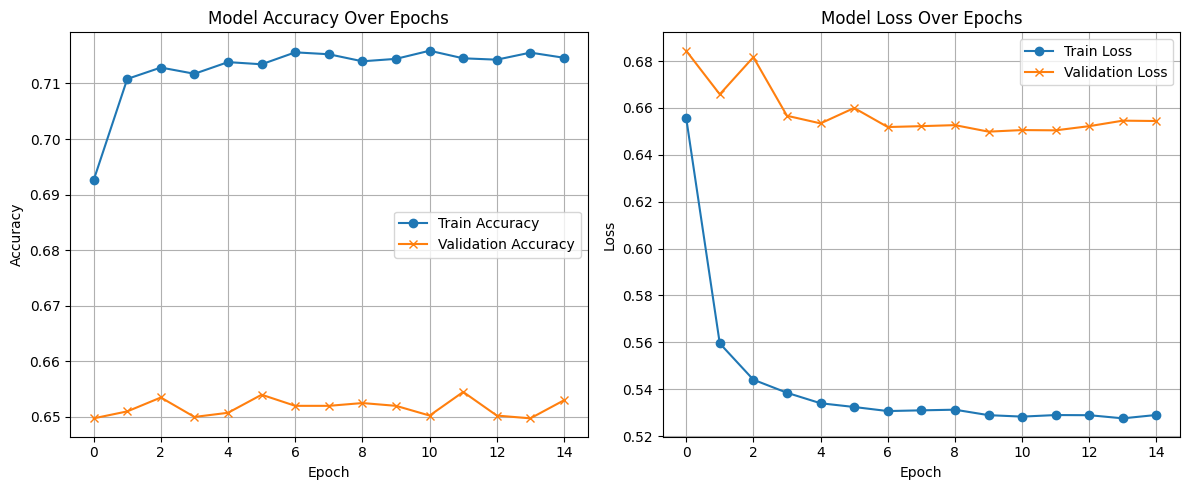

In [38]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

y_pred_probs=model.predict([X_ref_test, X_alt_test])
y_pred=(y_pred_probs > 0.5).astype(int)
print(classification_report(y_test,y_pred))


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
              precision    recall  f1-score   support

           0       0.58      0.03      0.06      1403
           1       0.65      0.99      0.79      2597

    accuracy                           0.65      4000
   macro avg       0.61      0.51      0.42      4000
weighted avg       0.63      0.65      0.53      4000



125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


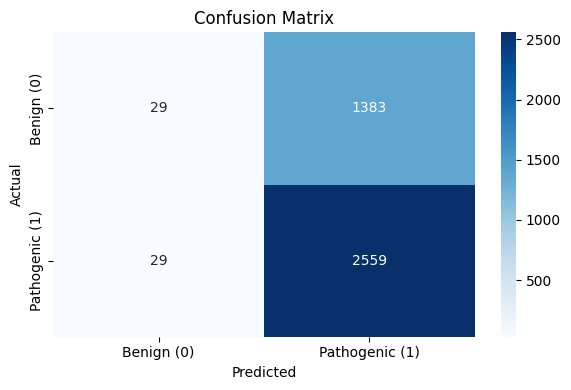

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_probs=model.predict([X_ref_test, X_alt_test])
y_pred=(y_pred_probs > 0.5).astype(int)

cm=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign (0)', 'Pathogenic (1)'],
            yticklabels=['Benign (0)', 'Pathogenic (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
